**RESULTADOS**

El objetivo de este desafío es ayudar al señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaremos cuál de estas cuatro tiendas tiene un desempeño menor, permitiendo al señor Juan tomar la decisión de cuál de estas cuatro tiendas debe vender para invertir en un nuevo negocio.

**Resultado:**
Luego de haber realizado un análisis tanto de los datos como la visualización de los datos, se recomienda la venta de la tienda 4 por las siguientes razones:
1.	La tienda 4 presenta un bajo rendimiento tanto económico como en su gestión.

2.	Posee las ganancias más bajas con un valor de $1.038.375,70 en contraste con las otras tiendas.

3.	También presenta una gran insatisfacción con los clientes, en comparación con las otras tiendas, presentando un 24,9%, el más bajo con respecto a las otras tiendas.

4.	Con respecto al promedio de costo de envío, la que presenta valores más bajos es la tienda 4 con $23.459,46, en comparación con las otras tiendas.

5.	De las 8 categorías de productos, la tienda 4 presenta ventas en solo 4 categorías, en las restantes (electrodomésticos, instrumentos musicales, libros, deportes), presenta ventas mínimas incluso nulas, lo que nos da una alarma de que el 50% está casi inactivo.


### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Ingresos por tienda
ingreso_tienda1=sum(tienda['Precio'])
ingreso_tienda2=sum(tienda2['Precio'])
ingreso_tienda3=sum(tienda3['Precio'])
ingreso_tienda4=sum(tienda4['Precio'])

#Ingreso total
ingreso_total=sum([ingreso_tienda1,ingreso_tienda2,ingreso_tienda3,ingreso_tienda4])

print(f'Los ingresos totales de la tienda 1 son: ${ingreso_tienda1:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Los ingresos totales de la tienda 2 son: ${ingreso_tienda2:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Los ingresos totales de la tienda 3 son: ${ingreso_tienda3:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Los ingresos totales de la tienda 4 son: ${ingreso_tienda4:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Los ingresos total de las 4 tiendas son: ${ingreso_total:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))

Los ingresos totales de la tienda 1 son: $1.150.880.400,00
Los ingresos totales de la tienda 2 son: $1.116.343.500,00
Los ingresos totales de la tienda 3 son: $1.098.019.600,00
Los ingresos totales de la tienda 4 son: $1.038.375.700,00
Los ingresos total de las 4 tiendas son: $4.403.619.200,00


In [3]:
import matplotlib.pyplot as plt


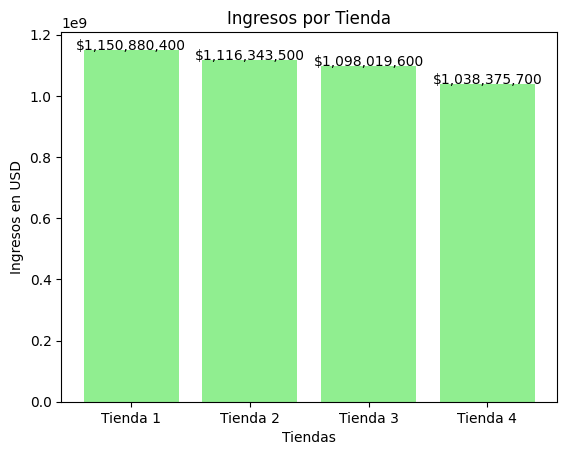

In [ ]:
almacenes = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear gráfico de barras
plt.bar(almacenes, ingresos, color='lightgreen')

# Agregar títulos y etiquetas
plt.title('Ingresos por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos en USD')

# Mostrar valores sobre las barras
for i, valor in enumerate(ingresos):
    plt.text(i, valor + 500, f"${valor:,.0f}", ha='center')

# Mostrar gráfico
plt.show()

# 2. Ventas por categoría

In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

tiendas_total=pd.concat([tienda,tienda2,tienda3,tienda4], ignore_index=True)
cat_mas_vendidas=tiendas_total.groupby(['Categoría del Producto','Tienda']).size().reset_index(name='Cantidad de Ventas')
cat_mas_vendidas = cat_mas_vendidas.sort_values(by=['Cantidad de Ventas' ], ascending=[False])
cat_populares_por_tienda = cat_mas_vendidas.sort_values(by='Cantidad de Ventas', ascending=False).groupby('Tienda').first().reset_index()



print(cat_mas_vendidas)
print(cat_populares_por_tienda)

     Categoría del Producto    Tienda  Cantidad de Ventas
30                  Muebles  Tienda 3                 499
31                  Muebles  Tienda 4                 480
28                  Muebles  Tienda 1                 465
15             Electrónicos  Tienda 4                 451
14             Electrónicos  Tienda 3                 451
12             Electrónicos  Tienda 1                 448
29                  Muebles  Tienda 2                 442
13             Electrónicos  Tienda 2                 422
23                 Juguetes  Tienda 4                 338
20                 Juguetes  Tienda 1                 324
22                 Juguetes  Tienda 3                 315
21                 Juguetes  Tienda 2                 313
8         Electrodomésticos  Tienda 1                 312
9         Electrodomésticos  Tienda 2                 305
4      Deportes y diversión  Tienda 1                 284
10        Electrodomésticos  Tienda 3                 278
7      Deporte

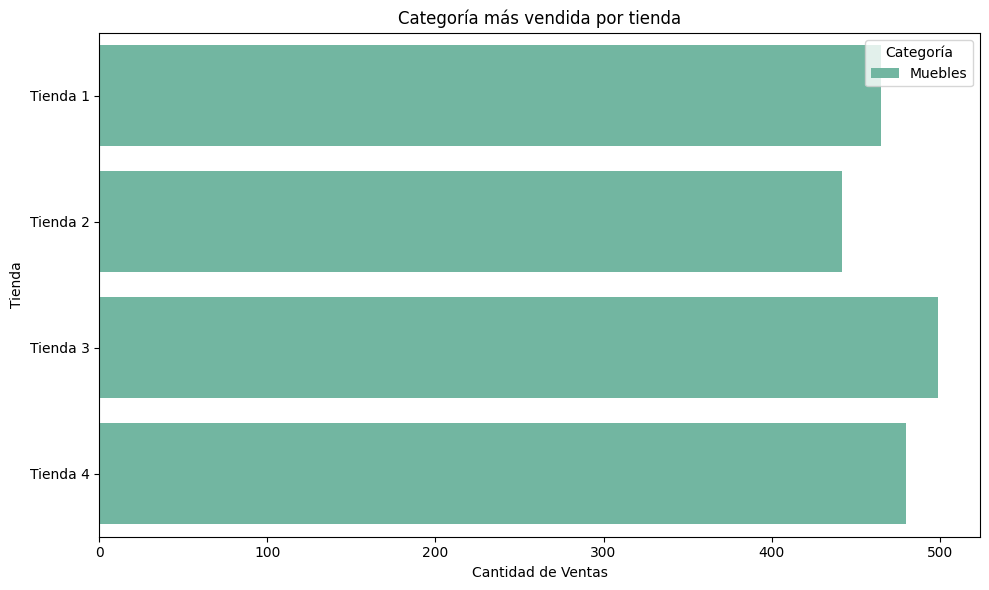

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico horizontal con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cat_populares_por_tienda,
    x='Cantidad de Ventas',
    y='Tienda',
    hue='Categoría del Producto',
    dodge=False,
    palette='Set2'
)

# Estética del gráfico
plt.title('Categoría más vendida por tienda')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Tienda')
plt.legend(title='Categoría')
plt.tight_layout()

# Mostrar gráfico
plt.show()




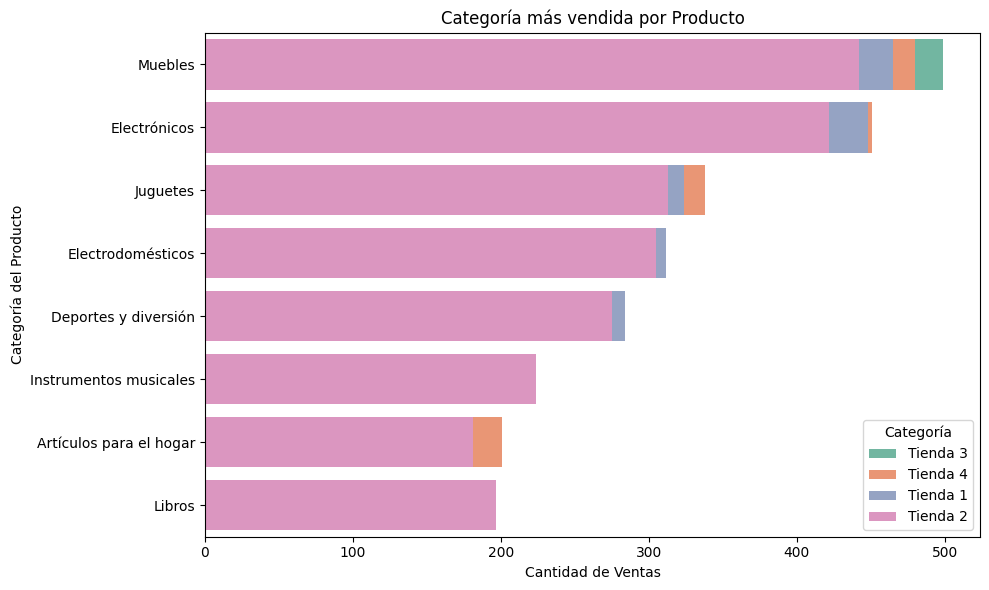

In [ ]:
# Gráfico horizontal con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data= cat_mas_vendidas,
    x='Cantidad de Ventas',
    y='Categoría del Producto',
    hue='Tienda',
    dodge=False,
    palette='Set2'
)

# Estética del gráfico
plt.title('Categoría más vendida por Producto')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Categoría del Producto')
plt.legend(title='Categoría')
plt.tight_layout()

# Mostrar gráfico
plt.show()



# 3. Calificación promedio de la tienda


In [ ]:
satisfaccion_tienda1=round(sum(tienda['Calificación'])/len(tienda['Calificación']),2)
satisfaccion_tienda2=round(sum(tienda2['Calificación'])/len(tienda2['Calificación']),2)
satisfaccion_tienda3=round(sum(tienda3['Calificación'])/len(tienda3['Calificación']),2)
satisfaccion_tienda4=round(sum(tienda4['Calificación'])/len(tienda4['Calificación']),2)

print(f'La calificación promedio de los clientes a la tienda 1 es: {satisfaccion_tienda1} ')
print(f'La calificación promedio de los clientes a la tienda 2 es: {satisfaccion_tienda2} ')
print(f'La calificación promedio de los clientes a la tienda 3 es: {satisfaccion_tienda3} ')
print(f'La calificación promedio de los clientes a la tienda 4 es: {satisfaccion_tienda4} ')

La calificación promedio de los clientes a la tienda 1 es: 3.98 
La calificación promedio de los clientes a la tienda 2 es: 4.04 
La calificación promedio de los clientes a la tienda 3 es: 4.05 
La calificación promedio de los clientes a la tienda 4 es: 4.0 


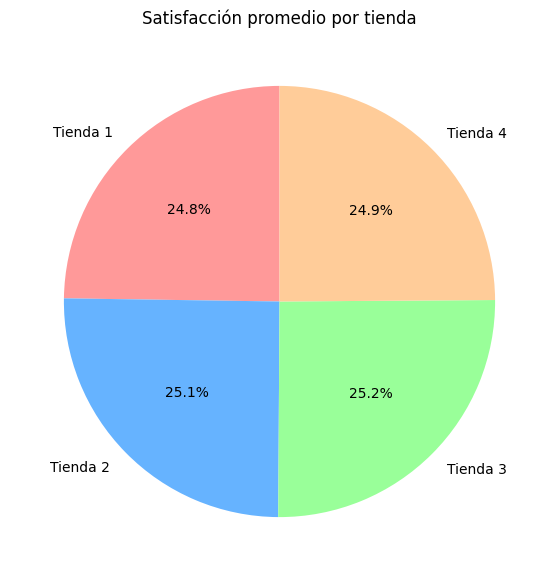

In [ ]:
import matplotlib.pyplot as plt

# Datos de satisfacción
satisfaccion = [satisfaccion_tienda1, satisfaccion_tienda2, satisfaccion_tienda3, satisfaccion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(satisfaccion, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])

# Título
plt.title('Satisfacción promedio por tienda')

# Mostrar gráfico
plt.show()


# 4. Productos más y menos vendidos

In [ ]:

# Lista de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]

# Recorrer cada tienda y mostrar solo el más y el menos vendido
for i, t in enumerate(tiendas, start=1):
    ventas = t['Producto'].value_counts()
    producto_mas_vendido = ventas.idxmax()
    cantidad_mas_vendido = ventas.max()

    producto_menos_vendido = ventas.idxmin()
    cantidad_menos_vendido = ventas.min()

    print(f"\nTienda {i}:")
    print(f"Producto más vendido: {producto_mas_vendido} con {cantidad_mas_vendido} unidades.")
    print(f"Producto menos vendido: {producto_menos_vendido} con {cantidad_menos_vendido} unidades.")






Tienda 1:
Producto más vendido: Microondas con 60 unidades.
Producto menos vendido: Auriculares con micrófono con 33 unidades.

Tienda 2:
Producto más vendido: Iniciando en programación con 65 unidades.
Producto menos vendido: Juego de mesa con 32 unidades.

Tienda 3:
Producto más vendido: Kit de bancas con 57 unidades.
Producto menos vendido: Bloques de construcción con 35 unidades.

Tienda 4:
Producto más vendido: Cama box con 62 unidades.
Producto menos vendido: Guitarra eléctrica con 33 unidades.


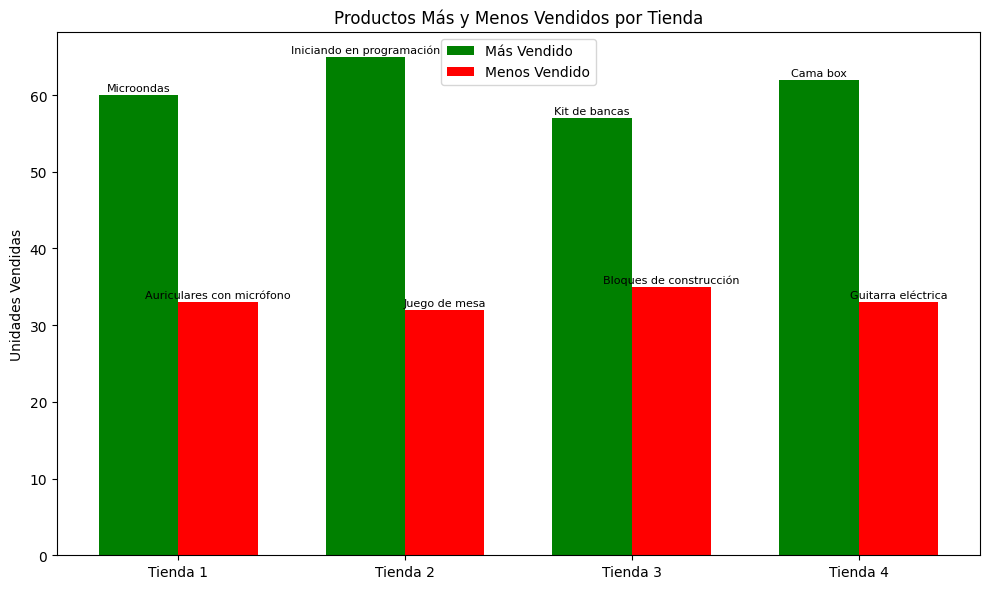

In [ ]:
import matplotlib.pyplot as plt

# Lista de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]

# Preparar los datos para graficar
productos_mas_vendidos = []
cantidades_mas_vendidos = []
productos_menos_vendidos = []
cantidades_menos_vendidos = []

for datos in tiendas:
    ventas = datos['Producto'].value_counts()
    productos_mas_vendidos.append(ventas.idxmax())
    cantidades_mas_vendidos.append(ventas.max())

    productos_menos_vendidos.append(ventas.idxmin())
    cantidades_menos_vendidos.append(ventas.min())

# Crear el gráfico
tienda_labels = [f"Tienda {i+1}" for i in range(len(tiendas))]

x = range(len(tiendas))
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x, cantidades_mas_vendidos, width=width, label='Más Vendido', color='green')
plt.bar([i + width for i in x], cantidades_menos_vendidos, width=width, label='Menos Vendido', color='red')

# Etiquetas
plt.xticks([i + width / 2 for i in x], tienda_labels)
plt.ylabel('Unidades Vendidas')
plt.title('Productos Más y Menos Vendidos por Tienda')
plt.legend()

# Mostrar nombres de productos arriba de las barras
for i in x:
    plt.text(i, cantidades_mas_vendidos[i] + 0.5, productos_mas_vendidos[i], ha='center', fontsize=8)
    plt.text(i + width, cantidades_menos_vendidos[i] + 0.5, productos_menos_vendidos[i], ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
envio_promedio_tienda1 = round(tienda['Costo de envío'].mean(), 2)
envio_promedio_tienda2 = round(tienda2['Costo de envío'].mean(), 2)
envio_promedio_tienda3 = round(tienda3['Costo de envío'].mean(), 2)
envio_promedio_tienda4 = round(tienda4['Costo de envío'].mean(), 2)

print(f'El costo promedio de envío de la tienda 1 es: ${envio_promedio_tienda1:,.2f} ')
print(f'El costo promedio de envío de la tienda 2 es: ${envio_promedio_tienda2:,.2f} ')
print(f'El costo promedio de envío de la tienda 3 es: ${envio_promedio_tienda3:,.2f} ')
print(f'El costo promedio de envío de la tienda 4 es: ${envio_promedio_tienda4:,.2f} ')

El costo promedio de envío de la tienda 1 es: $26,018.61 
El costo promedio de envío de la tienda 2 es: $25,216.24 
El costo promedio de envío de la tienda 3 es: $24,805.68 
El costo promedio de envío de la tienda 4 es: $23,459.46 


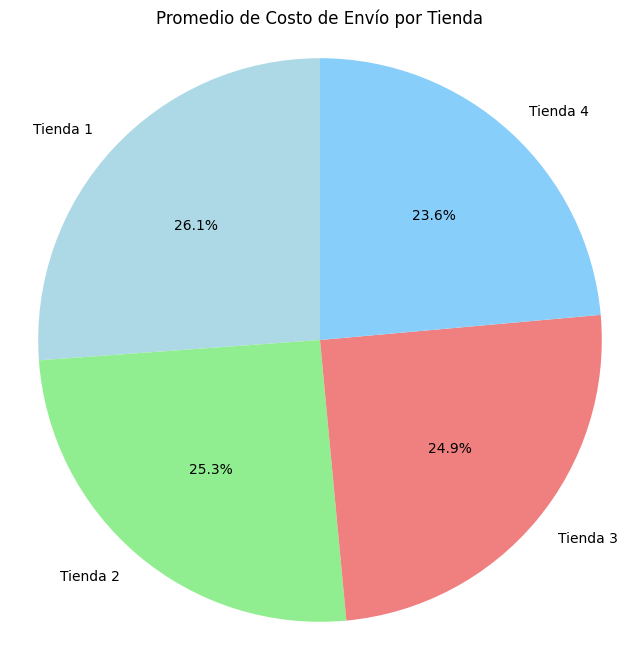

In [ ]:
import matplotlib.pyplot as plt
# Datos para el gráfico
promedios_envio = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(promedios_envio, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Promedio de Costo de Envío por Tienda')

# Mostrar el gráfico
plt.axis('equal')  # Para que la torta sea un círculo perfecto
plt.show()